# Open a World Ocean dataset from: https://www.ncei.noaa.gov/thredds-ocean/catalog/ncei/wod/1998/catalog.html?dataset=ncei/wod/1998/wod_xbt_1998.nc


In [1]:
import xarray as xr

# open the dataset (not uploaded to the repo beacause of size. Can be downloaded from: 
# https://www.ncei.noaa.gov/thredds-ocean/catalog/ncei/wod/1998/catalog.html?dataset=ncei/wod/1998/wod_xbt_1998.nc
)
ds = xr.open_dataset('wod_apb_2014.nc')
ds

SyntaxError: unmatched ')' (4253348364.py, line 5)

### Variables of interest: 'Salinity' and 'z_obs' (aka depth).
#### 'Salinity' has dimensions of 'Salinity_obs'. 'Salinity_obs' is just holds integer ordinates, so it does not relate to the time dimension directly.
#### However, there are additional Salinity Variables such as: 'Salinity_row_size' which is of dimension 'casts'. 
#### The coordinate 'time' is of dimension 'casts' as well.


In [ ]:
ds['Salinity_obs']

<xarray.DataArray 'Salinity_obs' (Salinity_obs: 645103)> Size: 5MB
array([     0,      1,      2, ..., 645100, 645101, 645102])
Dimensions without coordinates: Salinity_obs

In [ ]:
ds['Salinity'].values

array([33.599, 33.87 , 33.948, ..., 34.269, 34.404, 34.404], dtype=float32)

In [ ]:
# The 'Salinity_row_size' variable is a 1D array that contains the number of salinity observations for each cast, and therefore each profile.
ds['Salinity_row_size'].values

array([16., nan, nan, ..., 16., 16., 15.])

In [ ]:
# Time is associated with each cast. To associate the time with each salinity observation, we can use the 'Salinity_row_size' variable to repeat the time values.
# for each row size, assign that many time values to the salinity observation by creating a new dimension 'salinity_observation_time'.
# 
ds['Salinity_observation_time'] = xr.DataArray(
    ds['time'].values.repeat(ds['Salinity_row_size'].values.astype(int)), # repeat the time values for the number of salinity observations in each cast
    dims='Salinity_obs' # set the dimension of the new variable to 'Salinity_obs' to match the salinity observations array
)

ds['Salinity_observation_time']

/var/folders/xq/h4f55fjn11j_nxd6c_lv86k1py0jrm/T/ipykernel_16340/250227519.py:5: RuntimeWarning: invalid value encountered in cast
  ds['time'].values.repeat(ds['Salinity_row_size'].values.astype(int)), # repeat the time values for the number of salinity observations in each cast


<xarray.DataArray 'Salinity_observation_time' (Salinity_obs: 645103)> Size: 5MB
array(['2014-01-01T00:59:03.749999616', '2014-01-01T00:59:03.749999616',
       '2014-01-01T00:59:03.749999616', ...,
       '2014-12-31T23:29:03.749999616', '2014-12-31T23:29:03.749999616',
       '2014-12-31T23:29:03.749999616'], dtype='datetime64[ns]')
Dimensions without coordinates: Salinity_obs

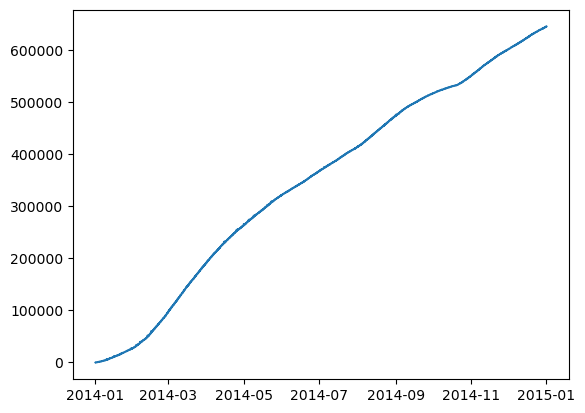

In [ ]:
# Now we can plot the salinity observations against time.
import matplotlib.pyplot as plt
plt.plot(ds['Salinity_observation_time'], ds['Salinity_obs'])

In [ ]:
# Now lets do the same for z_obs. Create a new dimension 'z_observation_time' that repeats the time values for each z_observation based on the 'z_row_size' variable.
ds['z_observation_time'] = xr.DataArray(
    ds['time'].values.repeat(ds['z_row_size'].values.astype(int)), # repeat the time values for the number of z observations in each cast
    dims='z_obs' # set the dimension of the new variable to 'z_obs' to match the z observations array
)

ds['z_observation_time']

<xarray.DataArray 'z_observation_time' (z_obs: 675905)> Size: 5MB
array(['2014-01-01T00:59:03.749999616', '2014-01-01T00:59:03.749999616',
       '2014-01-01T00:59:03.749999616', ...,
       '2014-12-31T23:29:03.749999616', '2014-12-31T23:29:03.749999616',
       '2014-12-31T23:29:03.749999616'], dtype='datetime64[ns]')
Coordinates:
    z        (z_obs) float32 3MB ...
Dimensions without coordinates: z_obs

In [ ]:
ds

<xarray.Dataset> Size: 95MB
Dimensions:                        (casts: 44671, z_obs: 675905,
                                    Temperature_obs: 668577,
                                    Salinity_obs: 645103, Pressure_obs: 456575)
Coordinates:
    lat                            (casts) float32 179kB ...
    lon                            (casts) float32 179kB ...
    time                           (casts) datetime64[ns] 357kB 2014-01-01T00...
    z                              (z_obs) float32 3MB ...
Dimensions without coordinates: casts, z_obs, Temperature_obs, Salinity_obs,
                                Pressure_obs
Data variables: (12/36)
    country                        (casts) |S40 2MB ...
    WOD_cruise_identifier          (casts) |S40 2MB ...
    originators_cruise_identifier  (casts) |S40 2MB ...
    wod_unique_cast                (casts) int32 179kB ...
    date                           (casts) int32 179kB ...
    GMT_time                       (casts) timedelta64[ns] 357kB ...
    ...                             ...
    Pressure                       (Pressure_obs) float32 2MB ...
    Pressure_sigfigs               (Pressure_obs) int8 457kB ...
    Pressure_row_size              (casts) float64 357kB ...
    crs                            int32 4B ...
    Salinity_observation_time      (Salinity_obs) datetime64[ns] 5MB 2014-01-...
    z_observation_time             (z_obs) datetime64[ns] 5MB 2014-01-01T00:5...
Attributes: (12/38)
    institution:                   National Centers for Environmental Informa...
    source:                        World Ocean Database
    references:                    World Ocean Database 2018. URL:http://data...
    title:                         World Ocean Database - Multi-cast file
    summary:                       Data for multiple casts from the World Oce...
    id:                            /nodc/data/oc5.clim.4/wod_update_nc/2014/w...
    ...                            ...
    history:                       
    license:                       
    standard_name_vocabulary:      CF Standard Name Table v41
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6

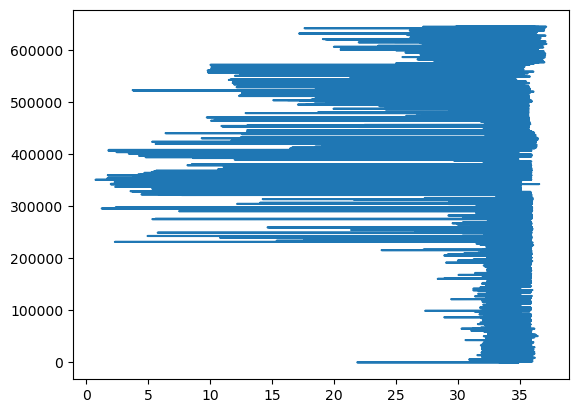

In [ ]:
# Now that we have a time variables created for both salinity and z observations, we can make new Salinity and z variables that have their respective time dimension.
# This will allow us to get Salinity and z values for each observation at a specific time.

# set the new time variables as dimensions for the Salinity and z variables
ds['Salinity_with_time'] = ds['Salinity'].assign_coords(time=ds['Salinity_observation_time'])
ds['z_with_time'] = ds['z'].assign_coords(time=ds['z_observation_time'])

# Now we can plot the salinity and z values against time.
plt.plot(ds['Salinity_with_time'], ds['Salinity_obs'])